In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load the image (convert to grayscale for simplicity)
img = cv2.imread('Mod4CT1.jpg', cv2.IMREAD_GRAYSCALE)

# Function to apply filters and return the results
def apply_filters(img, kernel_size, sigma1, sigma2):
    # Mean filter
    mean_filtered = cv2.blur(img, (kernel_size, kernel_size))
    
    # Median filter
    median_filtered = cv2.medianBlur(img, kernel_size)
    
    # Gaussian filter with sigma1
    gaussian_filtered_sigma1 = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma1)
    
    # Gaussian filter with sigma2
    gaussian_filtered_sigma2 = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma2)
    
    return mean_filtered, median_filtered, gaussian_filtered_sigma1, gaussian_filtered_sigma2

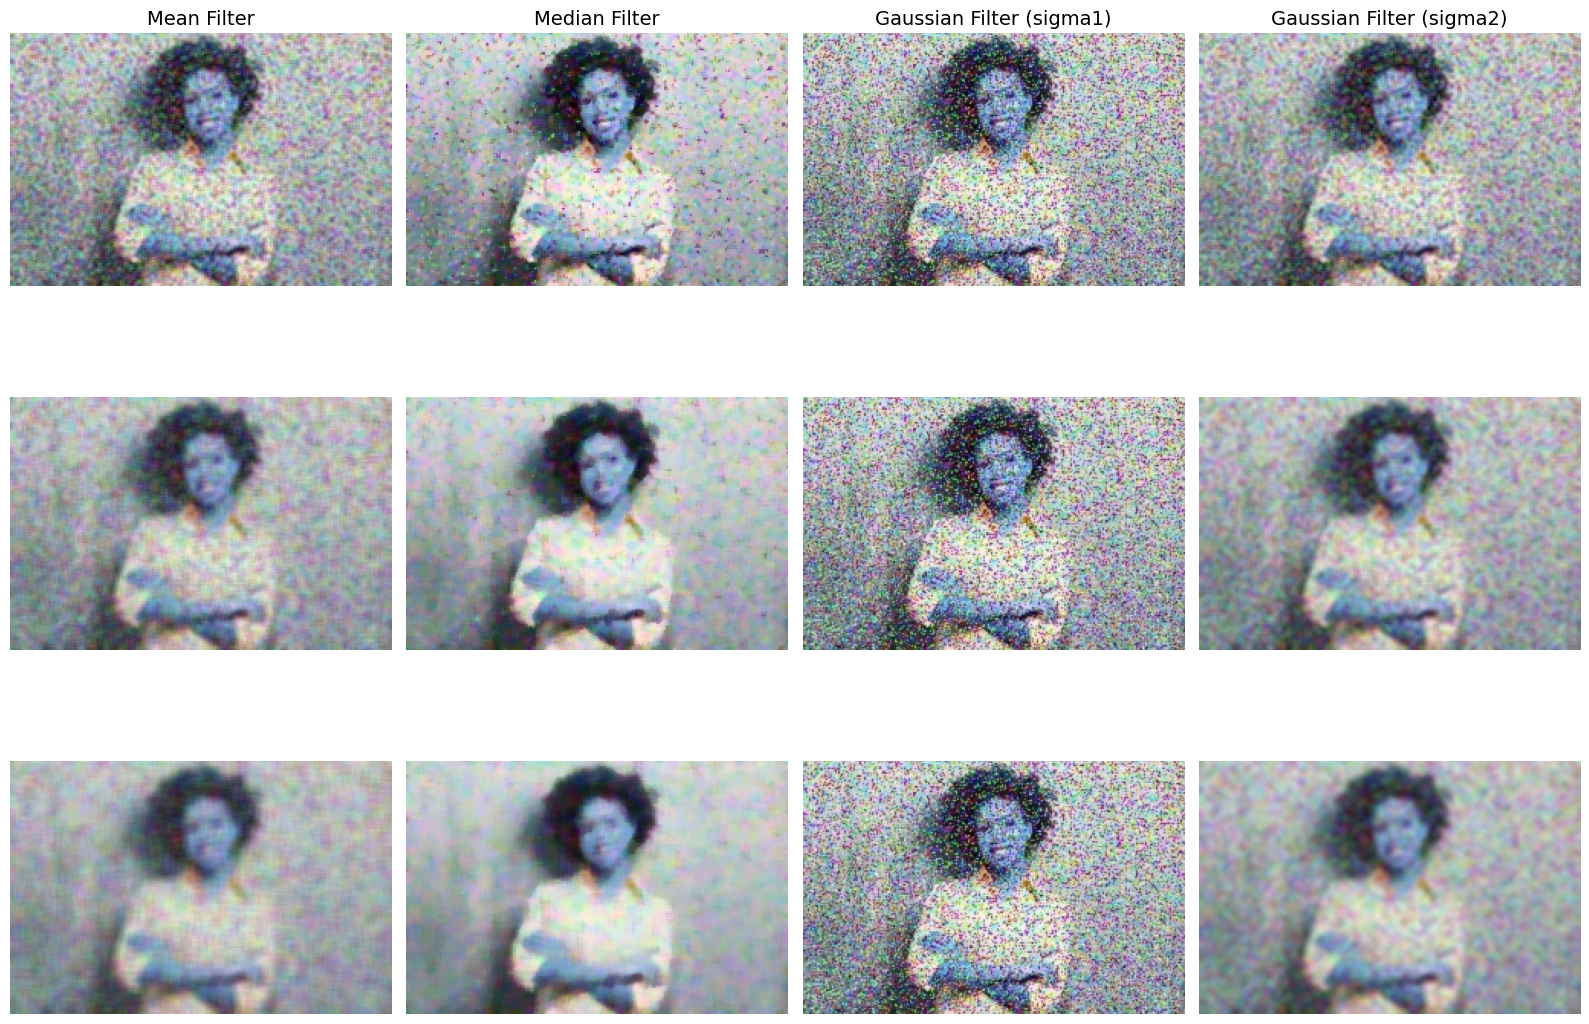

In [29]:
# Select sigma values (you can adjust based on experimentation)
sigma1 = 0.5  # A small sigma for finer smoothing
sigma2 = 2.0  # A larger sigma for more aggressive smoothing

# Apply filters for 3x3, 5x5, and 7x7 kernels
filters_3x3 = apply_filters(img, 3, sigma1, sigma2)
filters_5x5 = apply_filters(img, 5, sigma1, sigma2)
filters_7x7 = apply_filters(img, 7, sigma1, sigma2)

# Create subplots for comparison
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Titles for the columns
filter_titles = ['Mean Filter', 'Median Filter', 'Gaussian Filter (sigma1)', 'Gaussian Filter (sigma2)']
kernel_sizes = ['3x3 Kernel', '5x5 Kernel', '7x7 Kernel']

# Plot the results in a 3x4 grid
for i, (filters, kernel_size) in enumerate(zip([filters_3x3, filters_5x5, filters_7x7], kernel_sizes)):
    for j, (filtered_img, title) in enumerate(zip(filters, filter_titles)):
        axes[i, j].imshow(filtered_img, cmap='gray')
        axes[i, j].axis('off')
        if i == 0:
            axes[i, j].set_title(title, fontsize=14)  # Set titles for the first row
        if j == 0:
            axes[i, j].set_ylabel(kernel_size, fontsize=14)  # Set row labels

# Display the plots
plt.tight_layout()
plt.show()

cv2.imshow("Original", img)
cv2.waitKey(0) 
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load the image (in color)
img = cv2.imread('Mod4CT1.jpg')

# Function to apply filters to a color image
def apply_filters_color(img, kernel_size, sigma1, sigma2):
    # Split the color channels
    b, g, r = cv2.split(img)

    # Apply filters to each channel
    mean_b = cv2.blur(b, (kernel_size, kernel_size))
    mean_g = cv2.blur(g, (kernel_size, kernel_size))
    mean_r = cv2.blur(r, (kernel_size, kernel_size))
    mean_filtered = cv2.merge([mean_b, mean_g, mean_r])

    median_b = cv2.medianBlur(b, kernel_size)
    median_g = cv2.medianBlur(g, kernel_size)
    median_r = cv2.medianBlur(r, kernel_size)
    median_filtered = cv2.merge([median_b, median_g, median_r])

    gaussian_b_sigma1 = cv2.GaussianBlur(b, (kernel_size, kernel_size), sigma1)
    gaussian_g_sigma1 = cv2.GaussianBlur(g, (kernel_size, kernel_size), sigma1)
    gaussian_r_sigma1 = cv2.GaussianBlur(r, (kernel_size, kernel_size), sigma1)
    gaussian_filtered_sigma1 = cv2.merge([gaussian_b_sigma1, gaussian_g_sigma1, gaussian_r_sigma1])

    gaussian_b_sigma2 = cv2.GaussianBlur(b, (kernel_size, kernel_size), sigma2)
    gaussian_g_sigma2 = cv2.GaussianBlur(g, (kernel_size, kernel_size), sigma2)
    gaussian_r_sigma2 = cv2.GaussianBlur(r, (kernel_size, kernel_size), sigma2)
    gaussian_filtered_sigma2 = cv2.merge([gaussian_b_sigma2, gaussian_g_sigma2, gaussian_r_sigma2])

    return mean_filtered, median_filtered, gaussian_filtered_sigma1, gaussian_filtered_sigma2

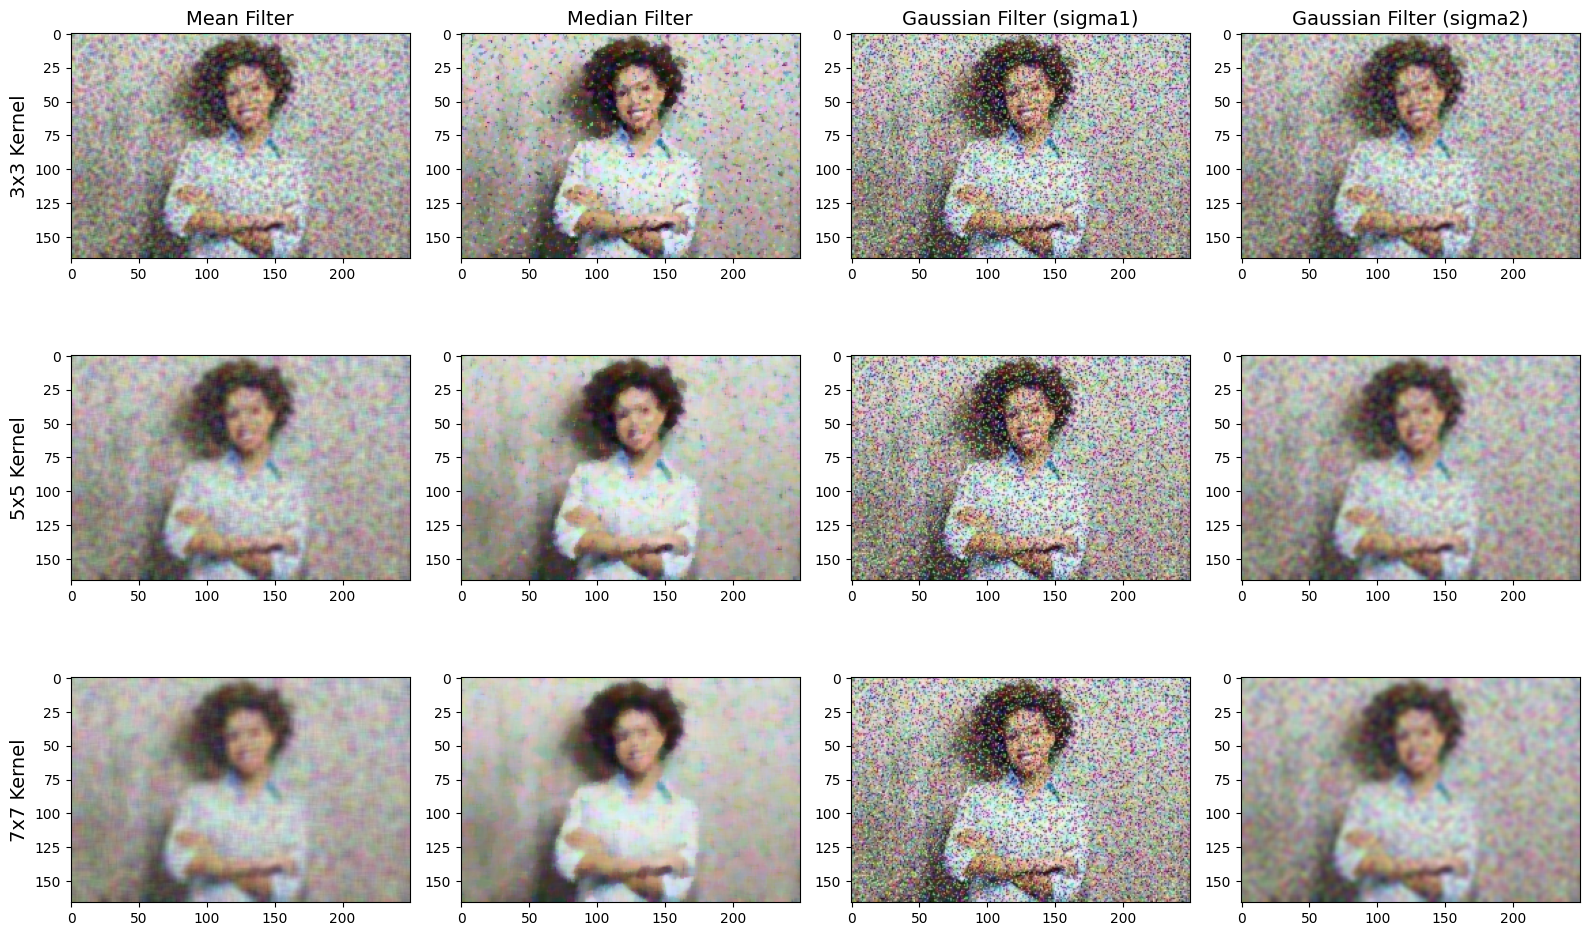

In [35]:
# Select sigma values
sigma1 = 0.5 # A small sigma for finer smoothing
sigma2 = 2.0  # A larger sigma for more aggressive smoothing

# Apply filters for 3x3, 5x5, and 7x7 kernels
filters_3x3 = apply_filters_color(img, 3, sigma1, sigma2)
filters_5x5 = apply_filters_color(img, 5, sigma1, sigma2)
filters_7x7 = apply_filters_color(img, 7, sigma1, sigma2)

# Create subplots for comparison
fig, axes = plt.subplots(3, 4, figsize=(16, 10))

# Titles for the columns
filter_titles = ['Mean Filter', 'Median Filter', 'Gaussian Filter (sigma1)', 'Gaussian Filter (sigma2)']
kernel_sizes = ['3x3 Kernel', '5x5 Kernel', '7x7 Kernel']

# Plot the results in a 3x4 grid
for i, (filters, kernel_size) in enumerate(zip([filters_3x3, filters_5x5, filters_7x7], kernel_sizes)):
    for j, (filtered_img, title) in enumerate(zip(filters, filter_titles)):
        axes[i, j].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        
        if i == 0:
            axes[i, j].set_title(title, fontsize=14)  # Set titles for the first row
        if j == 0:
            axes[i, j].set_ylabel(kernel_size, fontsize=14)  # Set row labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Popup of original for comparison
cv2.imshow("Original", img)
cv2.waitKey(0) 
cv2.destroyAllWindows()